In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The MNIST dataset is already included inside Keras’ own collection. 
### For  downloading visit https://www.tensorflow.org/datasets/catalog/mnist

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


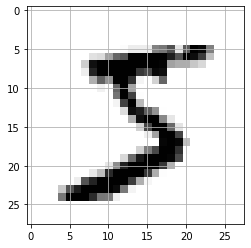

In [4]:
plt.imshow(X_train[0], cmap = 'binary')
plt.grid(True)
plt.show()

## NORMALIZATION OF DATA

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

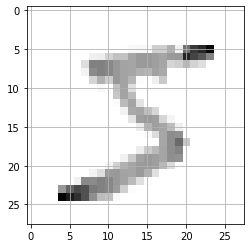

In [6]:
plt.imshow(X_train[0], cmap = 'binary')
plt.grid(True)
plt.show()

In [7]:
print(X_test[0]) # now all the values lies between range (0 - 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## CREATING MODEL

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
model = Sequential()
model.add(Flatten()) # making dimensions in 1D 
model.add(Dense(128, activation = 'relu')) # First hidden layer with 128 perceptron
model.add(Dense(128, activation = 'relu')) # Second hidden layer with 128 perceptron
model.add(Dense(10, activation = 'softmax')) # OUTPUT LAYER WITH 10 PERCEPTRON 

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## TRAINING MODEL

In [10]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2610 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1077 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9869


In [11]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9713


## Calculating Accuracy of Model

In [12]:
print('Loss of our model : ' + str(loss * 100) + "%")
print('Accuracy of our model : ' + str(acc * 100) + "%")

Loss of our model : 10.037851333618164%
Accuracy of our model : 97.13000059127808%


In [13]:
predict = model.predict([X_test])

Consider rewriting this model with the Functional API.


In [14]:
print(predict) # Here predict is the n*10 matrix, within each row it fills probability of
               # number correspond to column value. so we use np.argmax to find max value in row.

[[2.18165347e-11 4.81486351e-10 3.08158462e-07 ... 9.99996424e-01
  8.78973727e-10 1.48497952e-08]
 [3.73855914e-14 6.72826627e-06 9.99993324e-01 ... 5.62179101e-13
  4.05224725e-12 2.09428338e-18]
 [1.26622501e-09 9.99962568e-01 6.26911515e-07 ... 1.51821732e-05
  2.05878805e-05 2.56082870e-08]
 ...
 [1.12821306e-11 6.08866557e-09 2.23922858e-09 ... 1.60194006e-07
  5.63088349e-08 8.61425747e-07]
 [8.22421797e-10 3.93638766e-09 4.68702577e-11 ... 3.00798408e-09
  6.98074973e-06 3.44086467e-13]
 [1.38561385e-08 1.62110894e-08 4.59228300e-09 ... 1.15568395e-10
  3.82854548e-09 1.62914154e-10]]


In [15]:
for i in range(0, 5):
    print(np.argmax(predict[i])) # THIS IS OUR MODEL PREDICTION FOR FIRST 5 VALUES

7
2
1
0
4


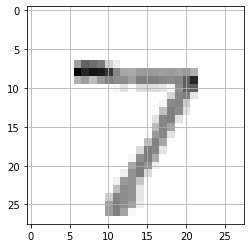

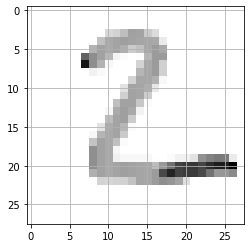

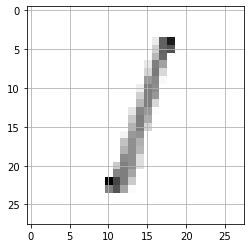

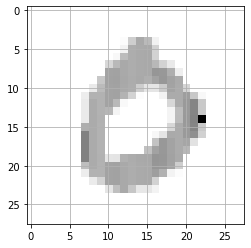

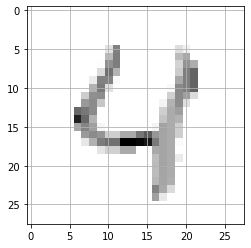

In [16]:
for i in range(0, 5) : # THESE ARE ACTUAL FIRST 5 VALUES
    plt.imshow(X_test[i], cmap = 'binary')
    plt.grid(True)
    plt.show()  